### Football Corners Forecast EDA

#### github.com/danielsaed/futbol_corners_forecast

#### Data obtained from https://fbref.com

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image

In [26]:
df_dataset = pd.read_csv("dataset\cleaned\dataset_cleaned.csv")
print(df_dataset.head())

   season        date                               game  round  day venue  \
0    1718  2017-08-11  2017-08-11 Arsenal-Leicester City      1  Fri  Home   
1    1718  2017-08-19      2017-08-19 Stoke City-Arsenal      2  Sat  Away   
2    1718  2017-08-27       2017-08-27 Liverpool-Arsenal      3  Sun  Away   
3    1718  2017-09-09     2017-09-09 Arsenal-Bournemouth      4  Sat  Home   
4    1718  2017-09-17         2017-09-17 Chelsea-Arsenal      5  Sun  Away   

      team  GF  GA        opponent  ... Touches_Att 3rd  Carries_PrgC  \
0  Arsenal   4   3  Leicester City  ...           252.0          31.0   
1  Arsenal   0   1      Stoke City  ...           280.0          32.0   
2  Arsenal   0   4       Liverpool  ...           133.0          15.0   
3  Arsenal   3   0     Bournemouth  ...           199.0          13.0   
4  Arsenal   0   0         Chelsea  ...           149.0          11.0   

   Touches_Touches  Touches_Att Pen  Carries_Carries  Carries_1/3  \
0            801.0     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32726 entries, 0 to 32725
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             32726 non-null  int64  
 1   date               32726 non-null  object 
 2   game               32726 non-null  object 
 3   round              32726 non-null  int64  
 4   day                32726 non-null  object 
 5   venue              32726 non-null  object 
 6   team               32726 non-null  object 
 7   GF                 32726 non-null  int64  
 8   GA                 32726 non-null  int64  
 9   opponent           32726 non-null  object 
 10  result             32726 non-null  object 
 11  Pass Types_CK      32722 non-null  float64
 12  Total_Att          32722 non-null  float64
 13  Long_Att           32722 non-null  float64
 14  Ast                32726 non-null  int64  
 15  1/3                32722 non-null  float64
 16  PrgP               327

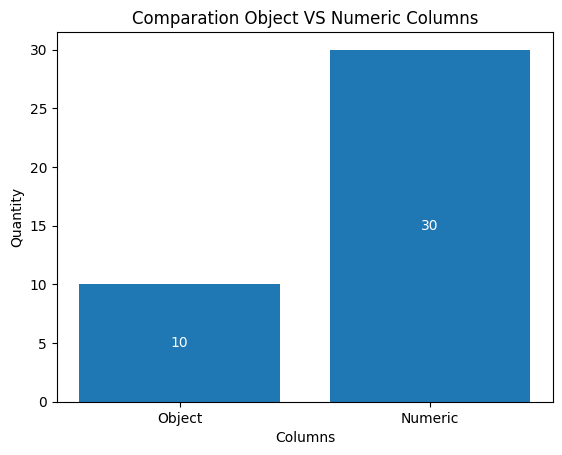

In [27]:
df_dataset.info()

numeric_cols = df_dataset.select_dtypes(include=['int64', 'float64'])
object_cols = df_dataset.select_dtypes(include='object')

# Crear DataFrame correctamente
df_columns_types = pd.DataFrame({"Type": ["Object", "Numeric"],"Count": [len(object_cols.columns), len(numeric_cols.columns)]})

bars = plt.bar(df_columns_types["Type"], df_columns_types["Count"])
plt.xlabel('Columns')
plt.ylabel('Quantity')
plt.title('Comparation Object VS Numeric Columns')

# Agregar valores en medio de las barras
plt.bar_label(bars, label_type='center',color="white")

plt.show()

### From the data, 10 columns are object and 20 numeric columns.

*Numeric data was previusly selected as the most important features to forecast corner kicks*



Object columns = "season","date","game","round","day","venue","team","result","local","away","league","opponent"

For the model probably I will not to use any object column, but I expect this columns to be key to group numerica data, for matches, seasons, etc.

<br>
<br>
<br>




In [28]:
df_dataset.isnull().sum()

season                 0
date                   0
game                   0
round                  0
day                    0
venue                  0
team                   0
GF                     0
GA                     0
opponent               0
result                 0
Pass Types_CK          4
Total_Att              4
Long_Att               4
Ast                    0
1/3                    4
PrgP                   4
Tackles_Att 3rd        4
Tackles_Tkl            4
Blocks_Blocks          4
Int                    0
Clr                    4
Expected_xG            4
Standard_Sh            0
Standard_SoT           0
Standard_Dist         19
Performance_Save%    927
SCA Types_SCA          4
Performance_Crs        0
Poss                   0
Touches_Att 3rd        4
Carries_PrgC           4
Touches_Touches        4
Touches_Att Pen        4
Carries_Carries        4
Carries_1/3            4
Carries_CPA            4
local                  0
away                   0
league                 0


In [29]:
df_dataset["Performance_Save%"].fillna(df_dataset["Performance_Save%"].mean())
df_dataset = df_dataset.dropna()
df_dataset.isna().sum()

season               0
date                 0
game                 0
round                0
day                  0
venue                0
team                 0
GF                   0
GA                   0
opponent             0
result               0
Pass Types_CK        0
Total_Att            0
Long_Att             0
Ast                  0
1/3                  0
PrgP                 0
Tackles_Att 3rd      0
Tackles_Tkl          0
Blocks_Blocks        0
Int                  0
Clr                  0
Expected_xG          0
Standard_Sh          0
Standard_SoT         0
Standard_Dist        0
Performance_Save%    0
SCA Types_SCA        0
Performance_Crs      0
Poss                 0
Touches_Att 3rd      0
Carries_PrgC         0
Touches_Touches      0
Touches_Att Pen      0
Carries_Carries      0
Carries_1/3          0
Carries_CPA          0
local                0
away                 0
league               0
dtype: int64

### The data source especifies (FBref.com) that the data Performance_Save% usually comes in null when the goalkeeper does no recive any shot

I filled with the mean since there was not a save, but its true that 0 also means that there was shots and the goalkeeper didnt save even 1, so it could be better to fill it with the mean.

<br>
<br>
<br>

In [30]:
df_dataset_correlacion = df_dataset.drop(["season","date","game","round","day","venue","team","result","local","away","league","opponent"],axis=1)
df_dataset_correlacion = df_dataset_correlacion.corr()

df_dataset_numeric = df_dataset.drop(["season","date","game","round","day","venue","team","result","local","away","league","opponent"],axis=1)

             season         round            GF            GA  Pass Types_CK  \
count  31780.000000  31780.000000  31780.000000  31780.000000   31780.000000   
mean    2074.315796     18.510636      1.390340      1.442354       4.912492   
std      240.751836     10.512676      1.252265      1.258639       2.860375   
min     1718.000000      1.000000      0.000000      0.000000       0.000000   
25%     1819.000000      9.000000      0.000000      1.000000       3.000000   
50%     2021.000000     18.000000      1.000000      1.000000       5.000000   
75%     2324.000000     27.000000      2.000000      2.000000       7.000000   
max     2425.000000     38.000000     10.000000     13.000000      26.000000   

          Total_Att      Long_Att           Ast           1/3          PrgP  \
count  31780.000000  31780.000000  31780.000000  31780.000000  31780.000000   
mean     485.965953     78.494179      0.942542     29.644588     38.003398   
std      122.758821     16.047149      1.0

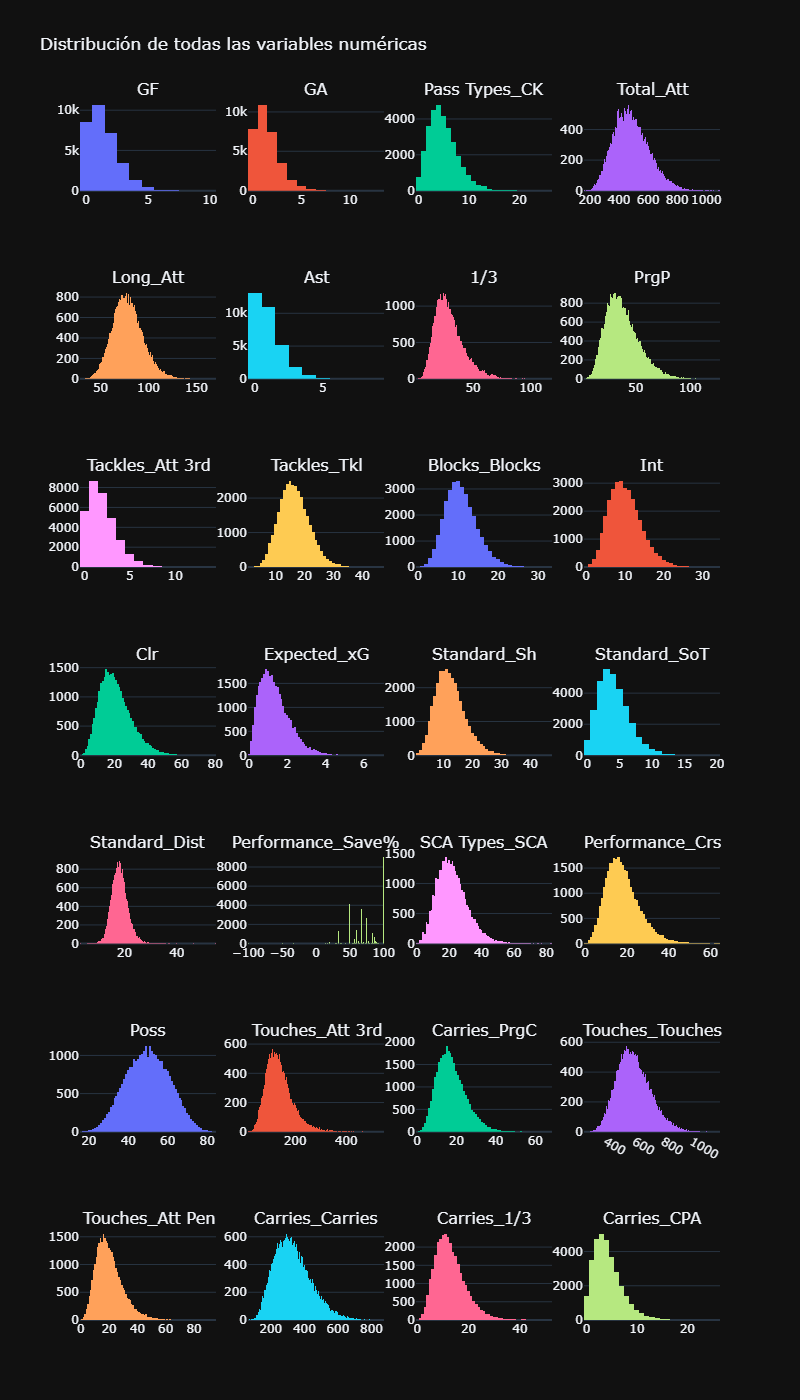

In [ ]:
print(df_dataset.describe())



# Define la ruta de tu imagen
ruta_imagen = 'img\histograma.png'

# Leer la imagen
img = Image.open(ruta_imagen)

# Mostrar la imagen directamente en Jupyter/Google Colab
display(img) 


Encontramos distribuciones normales, exponenciales y log

se pueden observar las anomalias en distintas variables

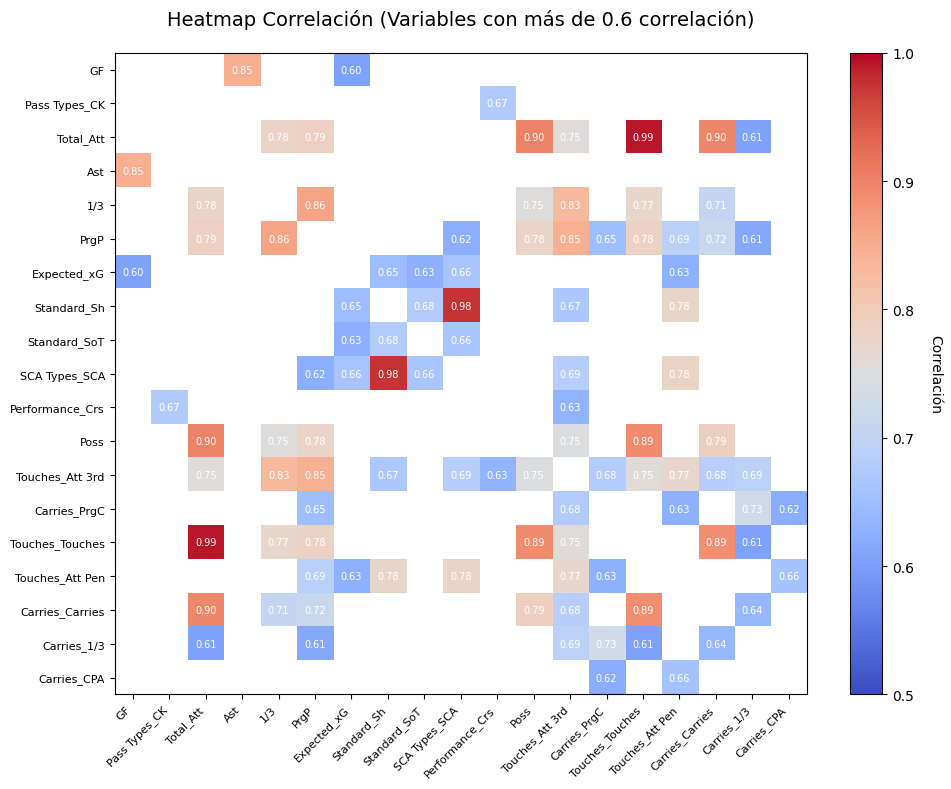

In [43]:


df_corr = df_dataset_correlacion[(df_dataset_correlacion > .6) & (df_dataset_correlacion < .999)]
df_corr = df_corr.dropna(how='all')
df_corr = df_corr.dropna(axis=1, how='all')

# Crear heatmap con matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(df_corr,cmap='coolwarm', aspect='auto', vmin=.5, vmax=1)

# Agregar colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlación', rotation=270, labelpad=20)

# Configurar etiquetas
ax.set_xticks(np.arange(len(df_corr.columns)))
ax.set_yticks(np.arange(len(df_corr.index)))
ax.set_xticklabels(df_corr.columns, rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(df_corr.index, fontsize=8)

# Agregar valores en las celdas
for i in range(len(df_corr.index)):
    for j in range(len(df_corr.columns)):
        value = df_corr.iloc[i, j]
        if not np.isnan(value):
            text = ax.text(j, i, f'{value:.2f}',
                          ha="center", va="center", 
                          color="white" if abs(value) > 0.5 else "black",
                          fontsize=7)

plt.title('Heatmap Correlación (Variables con más de 0.6 correlación)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()



Filetering correlation with more than 60% there are quite a lot of data correlate, i will search for more higher correlation to find any issue

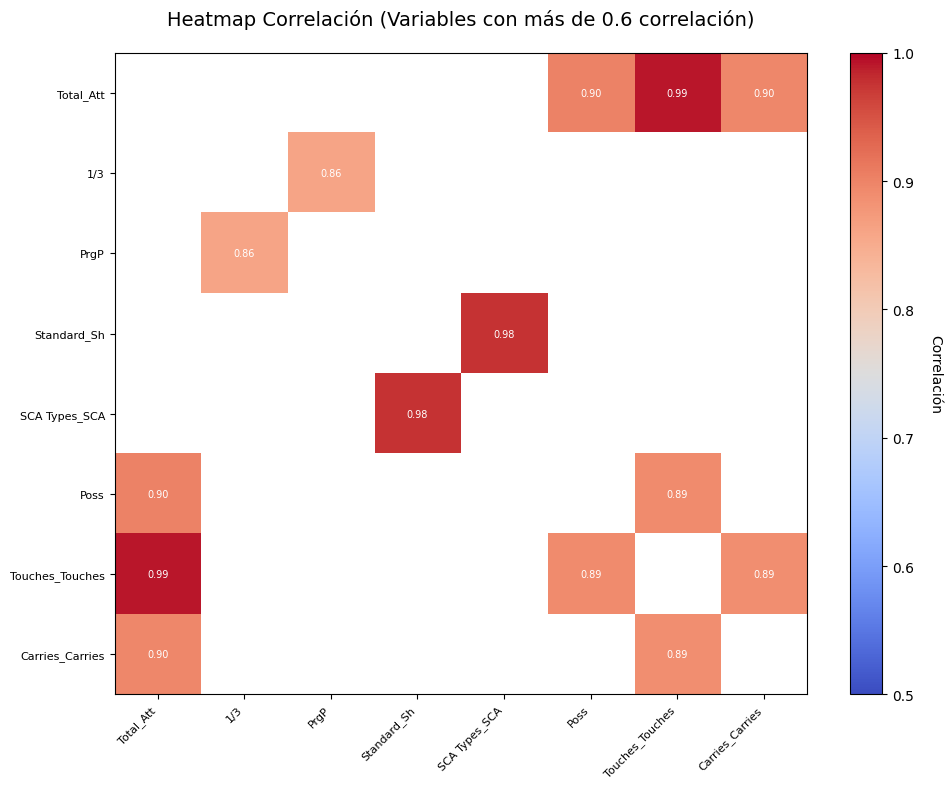

In [44]:
import plotly.express as px

df_corr = df_dataset_correlacion[(df_dataset_correlacion > .85) & (df_dataset_correlacion < .999)]
df_corr = df_corr.dropna(how='all')
df_corr = df_corr.dropna(axis=1, how='all')

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(df_corr, cmap='coolwarm', aspect='auto', vmin=.5, vmax=1)

# Agregar colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlación', rotation=270, labelpad=20)

# Configurar etiquetas
ax.set_xticks(np.arange(len(df_corr.columns)))
ax.set_yticks(np.arange(len(df_corr.index)))
ax.set_xticklabels(df_corr.columns, rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(df_corr.index, fontsize=8)

# Agregar valores en las celdas
for i in range(len(df_corr.index)):
    for j in range(len(df_corr.columns)):
        value = df_corr.iloc[i, j]
        if not np.isnan(value):
            text = ax.text(j, i, f'{value:.2f}',
                          ha="center", va="center", 
                          color="white" if abs(value) > 0.5 else "black",
                          fontsize=7)

plt.title('Heatmap Correlación (Variables con más de 0.6 correlación)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

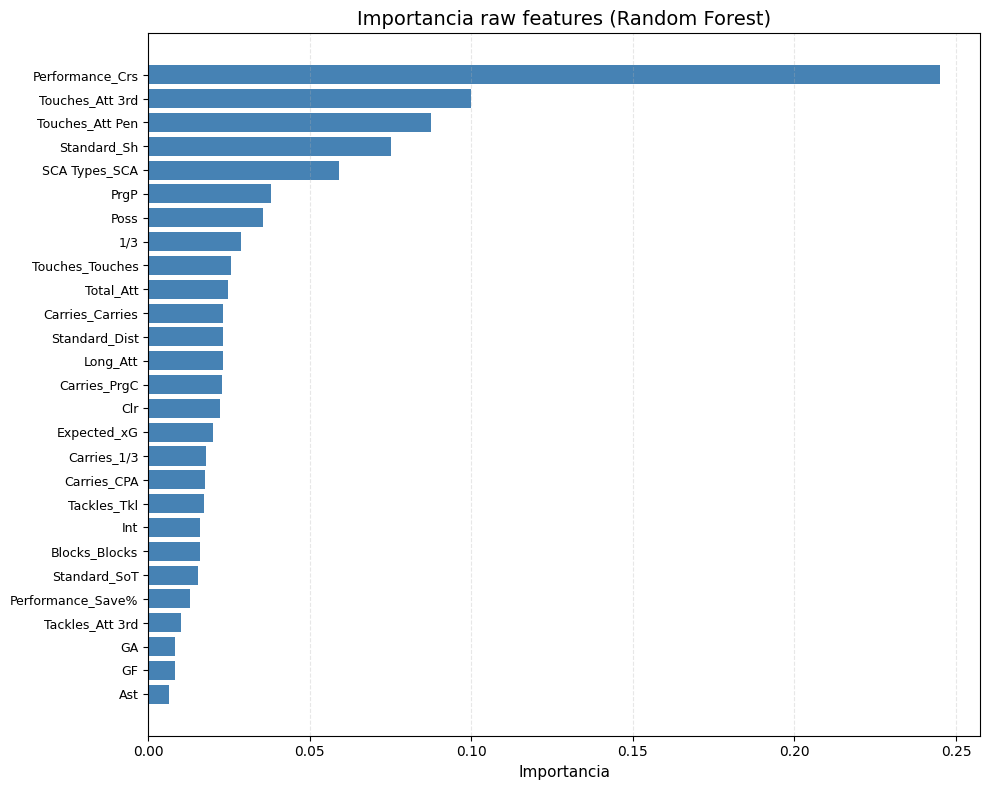

Top 10 features más importantes:
Performance_Crs: 0.2452
Touches_Att 3rd: 0.0999
Touches_Att Pen: 0.0874
Standard_Sh: 0.0751
SCA Types_SCA: 0.0590
PrgP: 0.0381
Poss: 0.0355
1/3: 0.0286
Touches_Touches: 0.0255
Total_Att: 0.0246


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

forest = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42,
    oob_score=True
)

#X_X = df_dataset_numeric.drop(["Pass Types_CK","Performance_Crs"], axis=1)

X_X = df_dataset_numeric.drop(["Pass Types_CK"],axis=1)
y = df_dataset_numeric["Pass Types_CK"].values.tolist()


scaler = StandardScaler()
scaler = scaler.fit(X_X)
X = scaler.transform(X_X)

forest.fit(X, y)

importance = forest.feature_importances_
indices = np.argsort(importance)

# Obtener nombres de las features
feature_names = X_X.columns

# Nombres ordenados por importancia
feature_names_sorted = feature_names[indices]


fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(range(len(importance)), importance[indices], color='steelblue')

# Configurar
ax.set_yticks(range(len(importance)))
ax.set_yticklabels(feature_names_sorted, fontsize=9)
ax.set_xlabel('Importancia', fontsize=11)
ax.set_title('Importancia raw features (Random Forest)', fontsize=14)

# Grid
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Ver las 10 más importantes
print("Top 10 features más importantes:")
for idx in indices[-10:][::-1]:
    print(f"{feature_names[idx]}: {importance[idx]:.4f}")

In [12]:
import pandas as pd
import numpy as np


# ===========================
# MÉTRICAS POR PARTIDO
# ===========================


# 8. sh_accuracy (Precisión de tiros)
df_dataset['sh_accuracy'] = np.where(
    df_dataset['Standard_Sh'] > 0,
    df_dataset['Standard_SoT'] / df_dataset['Standard_Sh'],
    0
)

# 9. xg_shot (Eficiencia xG por tiro)
df_dataset['xg_shot'] = np.where(
    df_dataset['Standard_Sh'] > 0,
    df_dataset['Expected_xG'] / df_dataset['Standard_Sh'],
    0
)

# 10. attacking_presence (% toques en área rival)
df_dataset['attacking_presence'] = np.where(
    df_dataset['Touches_Touches'] > 0,
    df_dataset['Touches_Att 3rd'] / df_dataset['Touches_Touches'],
    0
)

# 11. possession_shot (Tiros por posesión)
df_dataset['possession_shot'] = np.where(
    df_dataset['Poss'] > 0,
    df_dataset['Standard_Sh'] / df_dataset['Poss'],
    0
)

# 12. progressive_pass_ratio (Ratio de pases progresivos)
df_dataset['progressive_pass_ratio'] = np.where(
    df_dataset['Total_Att'] > 0,
    df_dataset['PrgP'] / df_dataset['Total_Att'],
    0
)

# 13. final_third_involvement (Participación en último tercio)
df_dataset['final_third_involvement'] = np.where(
    df_dataset['Total_Att'] > 0,
    df_dataset['1/3'] / df_dataset['Total_Att'],
    0
)

# 14. assist_sca (Asistencias por SCA)
df_dataset['assist_sca'] = np.where(
    df_dataset['SCA Types_SCA'] > 0,
    df_dataset['Ast'] / df_dataset['SCA Types_SCA'],
    0
)

# 15. creative_efficiency (Eficiencia creativa)
df_dataset['creative_efficiency'] = np.where(
    df_dataset['Poss'] > 0,
    df_dataset['SCA Types_SCA'] / df_dataset['Poss'],
    0
)

# 16. high_press_intensity (Intensidad de presión alta)
df_dataset['high_press_intensity'] = np.where(
    df_dataset['Tackles_Tkl'] > 0,
    df_dataset['Tackles_Att 3rd'] / df_dataset['Tackles_Tkl'],
    0
)

# 17. interception_tackle (Ratio intercepciones/tackles)
df_dataset['interception_tackle'] = np.where(
    df_dataset['Tackles_Tkl'] > 0,
    df_dataset['Int'] / df_dataset['Tackles_Tkl'],
    0
)

# 18. clearance_ratio (Ratio de despejes)
df_dataset['total_defensive_actions'] = df_dataset['Tackles_Tkl'] + df_dataset['Int']
df_dataset['clearance_ratio'] = np.where(
    df_dataset['total_defensive_actions'] > 0,
    df_dataset['Clr'] / df_dataset['total_defensive_actions'],
    0
)
df_dataset.drop('total_defensive_actions', axis=1, inplace=True)

# 19. progressive_carry_ratio (Ratio de conducciones progresivas)
df_dataset['progressive_carry_ratio'] = np.where(
    df_dataset['Carries_Carries'] > 0,
    df_dataset['Carries_PrgC'] / df_dataset['Carries_Carries'],
    0
)

# 20. carry_pass_balance (Balance conducción/pase progresivo)
df_dataset['carry_pass_balance'] = np.where(
    df_dataset['PrgP'] > 0,
    df_dataset['Carries_PrgC'] / df_dataset['PrgP'],
    0
)

# 21. offensive_index (Índice ofensivo)
df_dataset['offensive_index'] = np.where(
    df_dataset['Standard_Sh'] > 0,
    (df_dataset['GF'] + df_dataset['Expected_xG']) * (df_dataset['Standard_SoT'] / df_dataset['Standard_Sh']),
    0
)

# 22. transition_index (Índice de transición)
df_dataset['transition_index'] = np.where(
    df_dataset['Poss'] > 0,
    (df_dataset['PrgP'] + df_dataset['Carries_PrgC']) / df_dataset['Poss'],
    0
)

# Verificar nuevas columnas
print("Nuevas columnas agregadas:")
new_cols = ['sh_accuracy', 'xg_shot', 'attacking_presence', 'possession_shot', 
            'progressive_pass_ratio', 'final_third_involvement', 'assist_sca', 
            'creative_efficiency', 'high_press_intensity', 'interception_tackle', 
            'clearance_ratio', 'progressive_carry_ratio', 'carry_pass_balance', 
            'offensive_index', 'transition_index']
print(df_dataset[new_cols].head())

df_new = df_dataset[new_cols].copy()
df_concat = df_dataset.drop(["season","date","game","round","day","venue","team","result","local","away","league","opponent"],axis=1)

# Guardar dataset con nuevas features
df_dataset.to_csv("dataset/cleaned/dataset_with_features.csv", index=False)
print("\n✅ Dataset guardado en: dataset/cleaned/dataset_with_features.csv")

Nuevas columnas agregadas:
   sh_accuracy   xg_shot  attacking_presence  possession_shot  \
0     0.370370  0.092593            0.314607         0.397059   
1     0.333333  0.083333            0.325203         0.236842   
2     0.000000  0.075000            0.194444         0.153846   
3     0.529412  0.129412            0.272977         0.293103   
4     0.181818  0.127273            0.221068         0.224490   

   progressive_pass_ratio  final_third_involvement  assist_sca  \
0                0.091043                 0.080764    0.076923   
1                0.108280                 0.073885    0.000000   
2                0.083045                 0.039792    0.000000   
3                0.079745                 0.068581    0.096774   
4                0.059783                 0.045290    0.000000   

   creative_efficiency  high_press_intensity  interception_tackle  \
0             0.764706              0.086957             0.565217   
1             0.434211              0.266667   

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

forest = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42,
    oob_score=True
)

#X_X = df_dataset_numeric.drop(["Pass Types_CK","Performance_Crs"], axis=1)

X_X = df_new
y = df_dataset_numeric["Pass Types_CK"].values.tolist()


scaler = StandardScaler()
scaler = scaler.fit(X_X)
X = scaler.transform(X_X)

forest.fit(X, y)

importance = forest.feature_importances_
indices = np.argsort(importance)

# Obtener nombres de las features
feature_names = X_X.columns

# Nombres ordenados por importancia
feature_names_sorted = feature_names[indices]

fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(range(len(importance)), importance[indices], color='steelblue')

# Configurar
ax.set_yticks(range(len(importance)))
ax.set_yticklabels(feature_names_sorted, fontsize=9)
ax.set_xlabel('Importancia', fontsize=11)
ax.set_title('Importancia raw features (Random Forest)', fontsize=14)

# Grid
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()
# Ver las 10 más importantes
print("Top 10 features más importantes:")
for idx in indices[-10:][::-1]:
    print(f"{feature_names[idx]}: {importance[idx]:.4f}")

NameError: name 'df_new' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

forest = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42,
    oob_score=True
)

#X_X = df_dataset_numeric.drop(["Pass Types_CK","Performance_Crs"], axis=1)

X_X = df_concat.drop(["Pass Types_CK"],axis=1)
y = df_dataset_numeric["Pass Types_CK"].values.tolist()


scaler = StandardScaler()
scaler = scaler.fit(X_X)
X = scaler.transform(X_X)

forest.fit(X, y)

importance = forest.feature_importances_
indices = np.argsort(importance)

# Obtener nombres de las features
feature_names = X_X.columns

# Nombres ordenados por importancia
feature_names_sorted = feature_names[indices]

fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(range(len(importance)), importance[indices], color='steelblue')

# Configurar
ax.set_yticks(range(len(importance)))
ax.set_yticklabels(feature_names_sorted, fontsize=9)
ax.set_xlabel('Importancia', fontsize=11)
ax.set_title('Importancia raw features (Random Forest)', fontsize=14)

# Grid
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Ver las 10 más importantes
print("Top 10 features más importantes:")
for idx in indices[-10:][::-1]:
    print(f"{feature_names[idx]}: {importance[idx]:.4f}")

Top 10 features más importantes:
Performance_Crs: 0.2120
Touches_Att 3rd: 0.0757
attacking_presence: 0.0737
Touches_Att Pen: 0.0595
Standard_Sh: 0.0532
SCA Types_SCA: 0.0426
Poss: 0.0273
PrgP: 0.0234
possession_shot: 0.0231
progressive_pass_ratio: 0.0216
